# Fitting a Hologram

This notebook shows how to load a pre-recorded hologram of a colloidal sphere
into a Feature object and analyze it with Lorenz-Mie theory. The analysis yields
the radius of the sphere, the refractive index of the sphere, and the sphere's
three-dimensional location relative to the center of the imaging plane.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

from pylorenzmie.utilities import configuration
configuration.use_catch = False
from pylorenzmie.analysis import Frame

INFO:configuration: CATCH deselected in /Users/grier/python/pylorenzmie/utilities/configuration.py
INFO:configuration: Falling back to standard implementation


## Framework for Lorenz-Mie analysis
First, we instantiate a Frame() object. By default, Frame analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a description of the holographic microscope that records the images we wish to analyze. In this example, we specify that the instrument illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. For particles dispersed in water, the refractive index of the medium is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations.
The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.2)

frame = Frame(**configuration)

## Read in holographic microscopy data
Next, we load the (normalized) hologram we wish to fit. In the present example, we use OpenCV to load a pre-recorded hologram that was saved as a PNG image. We convert the image to grayscale and normalize it by the mean value. This hologram was cropped from a larger image. Since we are not interested in locating the particle within the original image, we provide the model with a standard coordinate system using the coordinates() helper function. We finally can provide the normalized image data to the Feature() object for analysis.

In [3]:
def report(frame, results):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.data, cmap='gray')
    ax.scatter(results.x_p, results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(results)

In [4]:
img = cv2.imread('tutorials/image0400.png', 0).astype(float)
img /= np.mean(img)

## Load the recorded image into the Frame

In [5]:
results = frame.analyze(img)

[{'x_p': 583.1079425376528, 'y_p': 684.4680185120783, 'bbox': ((475, 576), 216, 216)}, {'x_p': 883.550980477412, 'y_p': 747.369255185008, 'bbox': ((803, 667), 160, 160)}]


          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  582.491132  0.051749  686.120629  0.055306  217.867872  0.434328  1.185983   
1  883.633082  0.059339  748.062459  0.052158  113.786390  0.273337  1.225923   

       da_p       n_p      dn_p  success  npix    redchi  
0  0.003493  1.391769  0.000407     True  9331  8.354507  
1  0.002699  1.393737  0.000382     True  5120  6.052281  


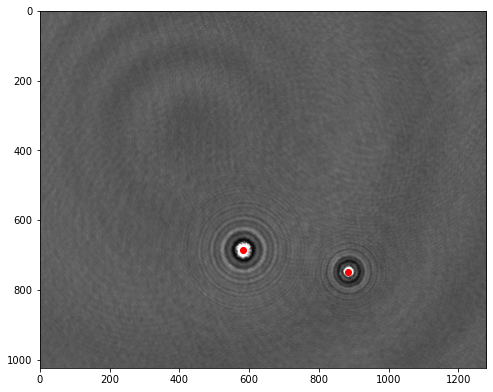

In [6]:
report(frame, results)

## Now that it's all set up, run it again

[{'x_p': 569.5407227835724, 'y_p': 712.4425725228161, 'bbox': ((425, 567), 289, 289)}, {'x_p': 925.611459301291, 'y_p': 726.7478202416022, 'bbox': ((784, 585), 283, 283)}]
          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  562.200978  0.066594  720.575553  0.064163  173.889145  0.345523  2.087577   
1  920.273743  0.067447  732.478934  0.065930  172.874439  0.357477  2.046209   

       da_p       n_p      dn_p  success   npix     redchi  
0  0.002866  1.369911  0.000133     True  16704  14.254369  
1  0.002918  1.369418  0.000132     True  16017  13.864828  


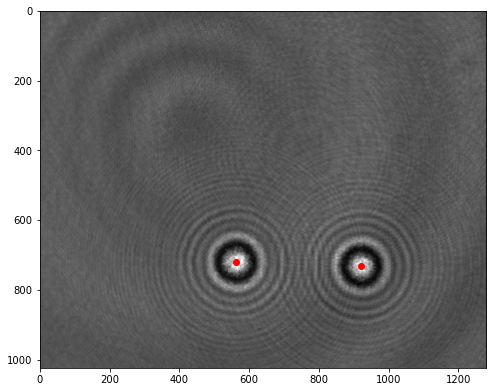

In [7]:
img = cv2.imread('tutorials/image0010.png', 0).astype(float)
img /= np.mean(img)
results = frame.analyze(img)
report(frame, results)